## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## Data validation

The dataset contains 15000 rows and 8 columns before cleaning and validation. The data does not have any duplicates. The following list takes each column to see if it follows the description given of the data. 
 

1. week: 6 different values for each week after launch, same as the description, no missing values. No cleaning required.
2. sales_method: 5 different categories, 3 expected. **Two of the categories are misspelled**. No missing values. I renamed the 2 misspelled categories for them to match the three sales methods naming.
3. customer_id: unique identifiers for each client in the database since there are no duplicates. They are all composed of 36 characters. No missing values. No cleaning required. 
4. nb_sold: numeric values just like in the description, with no missing values. No cleaning required. 
5. revenue: numeric values rounded up to two decimal places, just like in the description. There are **1047 missing values**. The missing values rows were dropped since filling could influence the results by associating a revenue to the wrong Sales method. 
6. years_as_customer: numeric values like in the description. However, there are two incoherent values. Since the company was created in 1984, the most years a person could have been a customer of the company is 41 years. The **two values are above that threshold**. We will replace them with 41, the maximum possible value.
7. nb_site_visits: numeric values like in the description. No missing values. No cleaning required.
8. state: 50 possible states of America, characters as described. No missing values. No cleaning required. 

After the validation the dataset contains 13926 rows and 8 columns, with no missing data. 

In [2]:
# Importing all the necessary packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin 
import scipy.stats as stats
# Importing the data

sales = pd.read_csv('product_sales.csv')
print('shape:', sales.shape)
sales.head()

shape: (15000, 8)


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
#General assessment of the dataframe

# Checking the values types of the dataframe
print(sales.info())

# Checking whether there are duplicates in the data 
print('number of duplicates:', sales.duplicated().sum())

# Checking for missing values
print('missing values: \n', sales.isna().sum())

# Data verification using the given table
print('week ', sales.week.count())
print(sales.week.value_counts())

print('\n sales_method ',sales.sales_method.count()) # wrongly spelled items
print(sales.sales_method.value_counts())

print('\n customer_id ',sales.customer_id.count())
print(sales.customer_id.value_counts())
print('number of characters in the id:', sales['customer_id'].str.len())
print('amount of ids different from 36:', (sales.customer_id.str.len() != 36).sum())

print('\n nb_sold ',sales.nb_sold.count())
print(sales.nb_sold.value_counts())

print('\n revenue ',sales.revenue.count()) # missing data
print(sales.revenue.value_counts())

print('\n years_as_customer ',sales.years_as_customer.count())
print(sales.years_as_customer.value_counts())
print('Incoherent values: \n', sales[sales.years_as_customer > 2024 - 1984 + 1]['years_as_customer'].value_counts())

print('\n nb_site_visits ',sales.nb_site_visits.count())
print(sales.nb_site_visits.value_counts())

print('\n state ',sales.state.count())
print(sales.state.value_counts())
print('\n amount of different states:', sales.state.value_counts().count())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None
number of duplicates: 0
missing values: 
 week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64
week  15000
1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: we

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64
Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []


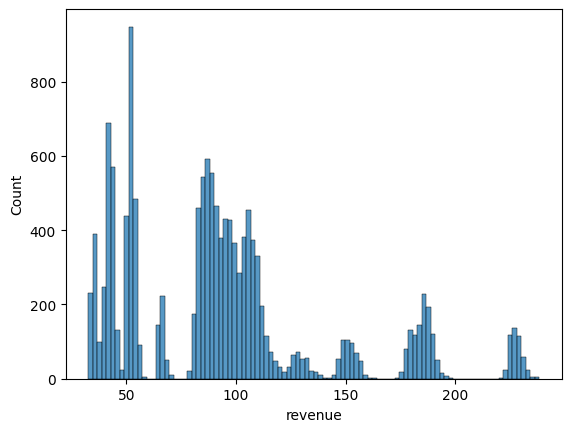

revenue before fill: 93.93494255349705


In [4]:
# Rewrting the misspelled values in sales_method
sales['sales_method'] = sales['sales_method'].replace('email', 'Email')
sales['sales_method'] = sales['sales_method'].replace('em + call', 'Email + Call')

# Checking that we only have three categories of values
print(sales.sales_method.value_counts())

# Replacing abherrent values with the maximum years as customer possible
sales['years_as_customer'] = sales['years_as_customer'].replace(63, 41)
sales['years_as_customer'] = sales['years_as_customer'].replace(47, 41)
#Checking that we have no values above the threshold
print(sales[sales['years_as_customer'] > 2024 - 1984 + 1])

#Looking at the revenue column distribution
sns.histplot(data = sales, x = 'revenue', bins = 100)
plt.show()

print('revenue before fill:', sales.revenue.mean())


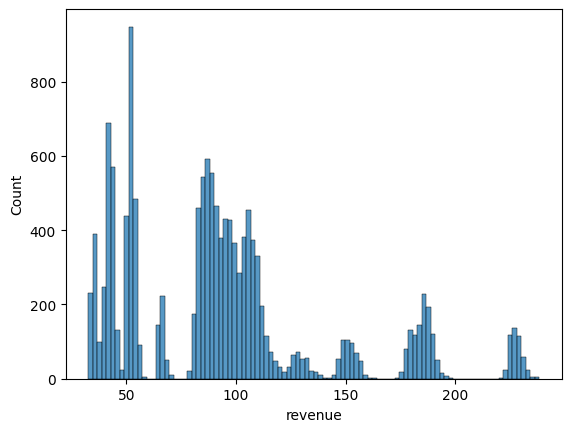

revenue mean after fill:  93.93494255349705
(13926, 8)
week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64


In [5]:
# dropping missing values
sales = sales.dropna()

# checking the impact of the dropping on the data distribution and mean
sns.histplot(data = sales, x = 'revenue', bins = 100)
plt.show()
print('revenue mean after fill: ', sales.revenue.mean())

# checking that the dataframe's new size
print(sales.shape)
print(sales.isna().sum())


## What does each sale method look like and what is their impact on the revenue?

From all the sales being done since the launch of the product, half of the clients were reached via the Email sale method. We can see that the Email + Call method was the least used, with less than 20%. We notice that the Call method was used to reach about 30% of the clients despite being the approach that takes the most time. 

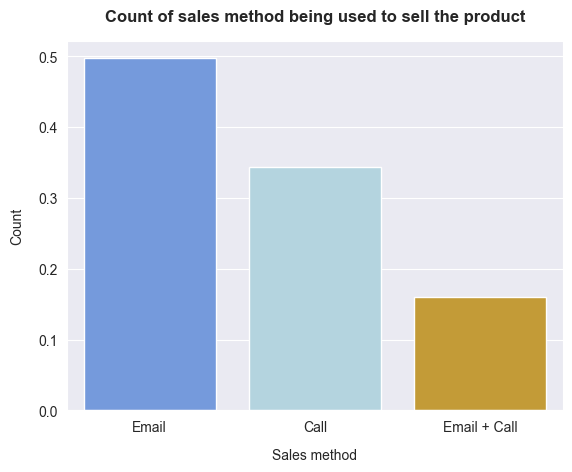

In [6]:
# Palette for each sales  method for it to be consistant
E_EC_C = {'Email':'cornflowerblue', 'Email + Call':'goldenrod', 'Call':'lightblue'}

# Setting style for seaborn representations
sns.set_style('darkgrid')

# Representing the percentage of each sale method being used
customer_count_per_method = sales['sales_method'].value_counts(normalize = True)
g = sns.barplot(data = customer_count_per_method, palette = E_EC_C)

plt.xlabel('Sales method', labelpad = 10)
plt.ylabel ( 'Count', labelpad = 10)
g.set_title('Count of sales method being used to sell the product', y = 1.03, fontweight = 'bold')
plt.show()


The spread of the revenue varies between 32.54 dollars and 238.32 dollars. We can see that a good part of the current revenue's density is centered around 48 dollars and 90 dollars. However, there are also a non negligeable amount of sales revenue above 140 dollars.

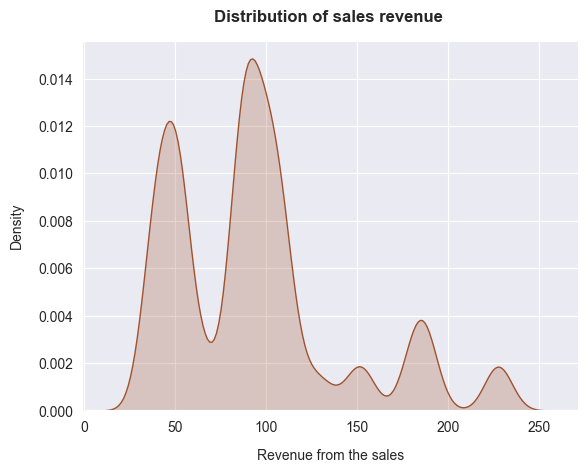

In [7]:
g = sns.kdeplot(data = sales, x = 'revenue', fill = True, color = 'sienna')
g.set_title('Distribution of sales revenue ', y = 1.03, fontweight = 'bold')

plt.xlabel('Revenue from the sales', labelpad = 10)
plt.ylabel ( 'Density', labelpad = 10)
plt.show()

By looking at the range of the revenue by method, we can see that the method with the highest revenue on average is the Email + Call method with the majority of its revenue ranging from 151 dollars to 190 dollars. We also notice that the Call method seems to generate the least revenue. Additionally, there appear to be a few outliers for the email and call method, with a tendency to be higher than the range of the method.  

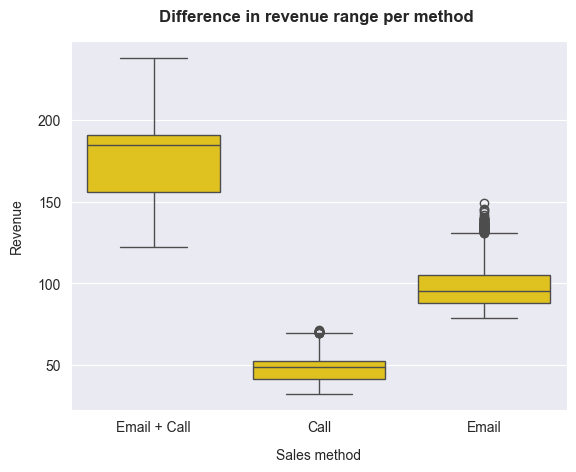

In [8]:
sns.reset_defaults()
sns.set_style('darkgrid')
g = sns.boxplot(data = sales, x = 'sales_method', y = 'revenue', color = 'gold')
sales.groupby('sales_method')['revenue'].quantile([0.25, 0.75]).round(0)
g.set_title('Difference in revenue range per method ', y = 1.03, fontweight = 'bold')

plt.xlabel('Sales method', labelpad = 10)
plt.ylabel ( 'Revenue', labelpad = 10)
plt.show()

## What is the best method to sell the new product to maximize the global revenue?

By multiplying the revenue with the number of new products sold, we get the total revenue. When looking at the total revenue by sales method, we can see that the current biggest source of revenue is the Email method with more than 7 million dollars. Moreover, we can also see that despite being the least used sales method, Email + Call still constitutes **nearly 40% of the total revenue**. 

As we've seen before, Email + Call has a range including a higher revenue hence bringing more revenue overall for the same number of products sold. Besides, this sales method takes less time than the Call method, which also brings back less revenue. Therefore, **we should give priority to both Email and Email + Call methods** and reduce the number of clients only reached by Call to improve revenue and reduce sale time. 

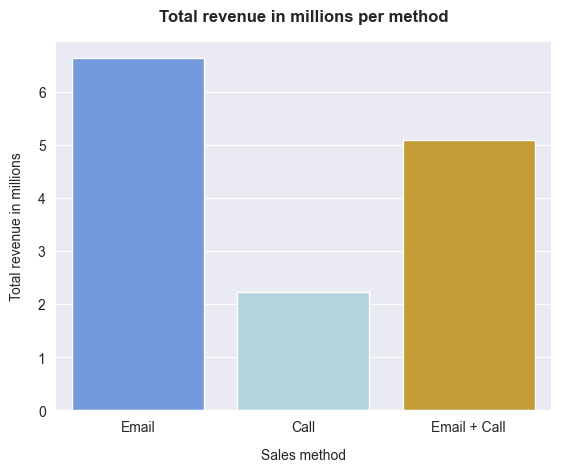

In [9]:
#Creating a new column with the total revenue
sales['total_revenue'] = sales['nb_sold'] * sales['revenue']

total_revenues = sales.groupby('sales_method')['total_revenue'].sum()

#total revenues overall
total = total_revenues.sum()
#proportion of revnue by Email + Call
total_revenues['Email + Call'] / total

#Converting the total revenue in millions
million_total_revenues = total_revenues.apply(lambda x: x/1000000)
order = ['Email', 'Call', 'Email + Call']

g = sns.barplot(data = million_total_revenues, palette = E_EC_C, order = order)
g.set_title('Total revenue in millions per method', fontweight = 'bold', y = 1.03)

plt.xlabel('Sales method', labelpad = 10)
plt.ylabel ( 'Total revenue in millions', labelpad = 10)
plt.show()

## Is there a difference in revenue over time for each method?

Time seems to have a significant influence on the revenue by method. Indeed, we can see that for all the sales method, there is an increase in the revenue as the weeks since the product launched increases. We also notice that the sharpest increase in revenue is found for the Email + Call method, for which the revenue increased almost twofold in 6 weeks. 

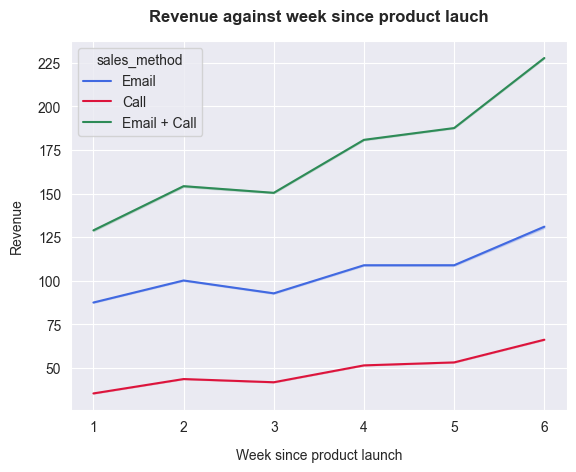

In [10]:
# Plotting the revenue against time for each sales method
line_palette = ['royalblue', 'crimson', 'seagreen']
g = sns.lineplot(data = sales, x = 'week', y = 'revenue', palette = line_palette, hue = 'sales_method', hue_order = order)
plt.ylabel('Revenue', labelpad = 10)
plt.xlabel ( 'Week since product launch', labelpad = 10)
g.set_title('Revenue against week since product lauch', fontweight = 'bold', y = 1.03)
plt.show()

## Additional insight on the clients

All the sales method seems to generate about the same amount of site visits. Which means that for most of the clients, the sale was preceded by multiple visits of the website. 
Consequently, to maximize sells, we should promote the website more in the emails or by call if it is not already done. Finding a way to make the website more attractive to new customers would be another way to achieve that.

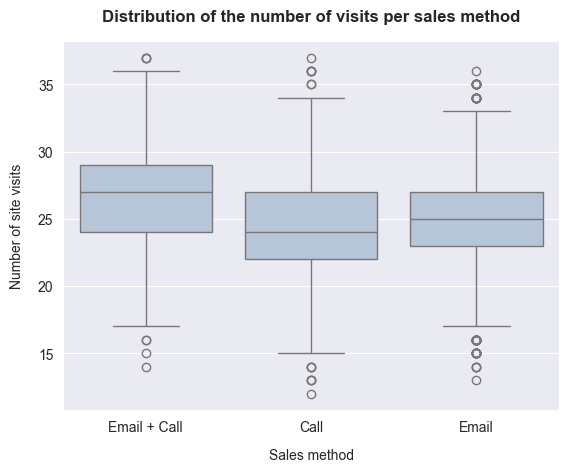

In [11]:
g = sns.boxplot(data = sales, x = 'sales_method', y = 'nb_site_visits', color = 'lightsteelblue')
g.set_title('Distribution of the number of visits per sales method', fontweight = 'bold', y = 1.03)
plt.xlabel('Sales method', labelpad = 10)
plt.ylabel( 'Number of site visits', labelpad = 10)
plt.show()

## Business metrics

Since we want to increase the total revenue generated from the sales of the new product, I recommend we use the **percentage of sales done with an Email + Call method.** This method appears to be the most lucrative, and increasing the number of sales with this method should also increase the general revenue. 

For the past 6 weeks of the product's launch, the percentage of sales done with the Email + Call method was of 17%. If in the next 6 weeks, we increase this number we should be in good shape to achieve our goal.


## Recommendations

- Following the business metric should show if there will be an increase in revenue over time
- Complementary recommendations to increase revenue and decrease time spent on sales:
    - Decreasing the use of the Call sales method 
    - Keeping the percentage of sales done through Email steady
- Increase the attractivity of the website and or its promotion
- Data collection for confirmation of the trends
    - Improving the data consistency: trying to reduce the amount of null data for the revenue
    - New related data: include a satisfaction survey to understand why customers perfer a certain method


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation